# *Importing modules*

In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns
from matplotlib import pyplot as plt

# *Making Random Points*

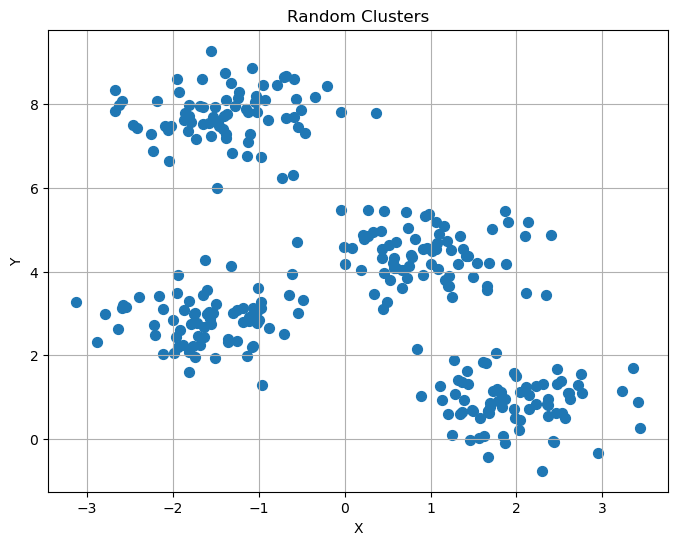

In [3]:
from sklearn.datasets import make_blobs

# Generate random clusters
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Random Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# *Model*

In [8]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300,tol=0.0001, random_state=33)
model.fit(X)
# init: {‘k-means++’, ‘random’} use k-means++ it is faster as it depend on probabilty destripution
# n_init : Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems

H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=4, n_init=10, random_state=33)

In [9]:
model.score(X)

-212.00599621083484

# *Getting clusters Centers*

In [10]:
model.cluster_centers_

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314]])

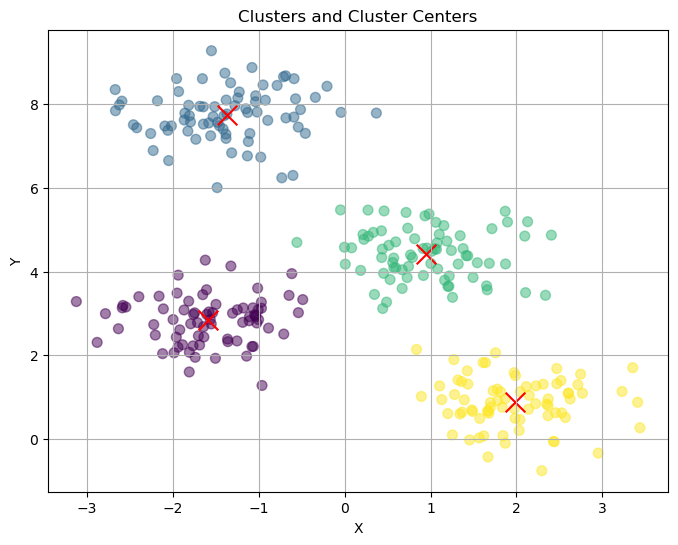

In [15]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=50, cmap='viridis', alpha=0.5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', c='red', s=200)
plt.title('Clusters and Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# *Determine Optimal Number of Clusters*

H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

Text(0.5, 1.0, 'Elbow Method')

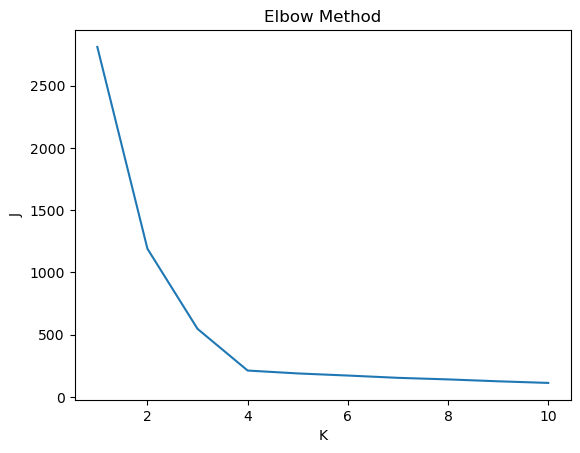

In [16]:
my_list = []
n = 11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    my_list.append(kmeans.inertia_)
plt.plot(np.arange(1,11),my_list)
plt.xlabel('K')
plt.ylabel('J')
plt.title('Elbow Method')
# by showing the graph the optimal one is 4

In [17]:
model.labels_

array([3, 1, 2, 1, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 3, 2, 2, 3, 0, 0, 3, 3,
       2, 0, 0, 2, 3, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 3, 2, 0, 2, 2,
       0, 0, 1, 0, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 1, 3, 1, 2, 1, 0, 0, 0,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 3, 2,
       1, 1, 2, 3, 1, 0, 0, 2, 3, 3, 2, 0, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2,
       0, 0, 3, 1, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       3, 0, 1, 0, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2, 3, 2, 2, 1, 3, 2, 0, 1,
       3, 3, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 3, 1, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 3, 3, 2,
       1, 3, 3, 0, 3, 0, 2, 1, 1, 2, 2, 1, 2, 3, 0, 2, 3, 0, 1, 0, 3, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 2, 0, 3, 2, 0, 0, 0, 3, 3, 1, 2, 2, 0, 3,
       1, 0, 2, 1, 2, 3, 3, 0, 0, 2, 3, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3,
       1, 0, 1, 2, 3, 3, 1, 1, 1, 3, 3, 2, 1, 0])

# *Evaulation of model*

In [18]:
model.inertia_
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided

212.00599621083484

In [19]:
model.n_iter_

3

In [20]:
model.predict(X)

array([3, 1, 2, 1, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 3, 2, 2, 3, 0, 0, 3, 3,
       2, 0, 0, 2, 3, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 3, 2, 0, 2, 2,
       0, 0, 1, 0, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 1, 3, 1, 2, 1, 0, 0, 0,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 3, 2,
       1, 1, 2, 3, 1, 0, 0, 2, 3, 3, 2, 0, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2,
       0, 0, 3, 1, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       3, 0, 1, 0, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2, 3, 2, 2, 1, 3, 2, 0, 1,
       3, 3, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 3, 1, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 3, 3, 2,
       1, 3, 3, 0, 3, 0, 2, 1, 1, 2, 2, 1, 2, 3, 0, 2, 3, 0, 1, 0, 3, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 2, 0, 3, 2, 0, 0, 0, 3, 3, 1, 2, 2, 0, 3,
       1, 0, 2, 1, 2, 3, 3, 0, 0, 2, 3, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3,
       1, 0, 1, 2, 3, 3, 1, 1, 1, 3, 3, 2, 1, 0])

# *Applying it to DataFrame*

In [21]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()

# Create DataFrame
dataframe = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the DataFrame
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks tha

Text(0.5, 1.0, 'Elbow Method')

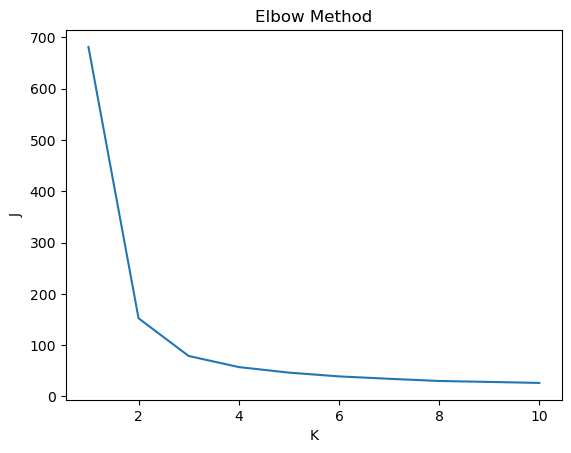

In [22]:
# Determine Optimal number of clusters
x=dataframe.loc[:,:]
my_list = []
n = 11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    my_list.append(kmeans.inertia_)
plt.plot(np.arange(1,11),my_list)
plt.xlabel('K')
plt.ylabel('J')
plt.title('Elbow Method')
# so from graph we conclude that k=3 is optimal

In [25]:
# Initialize K-means clustering model
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=33)

# Fit the model to the data
model.fit(x)


H:\anaconda projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=33)

In [26]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

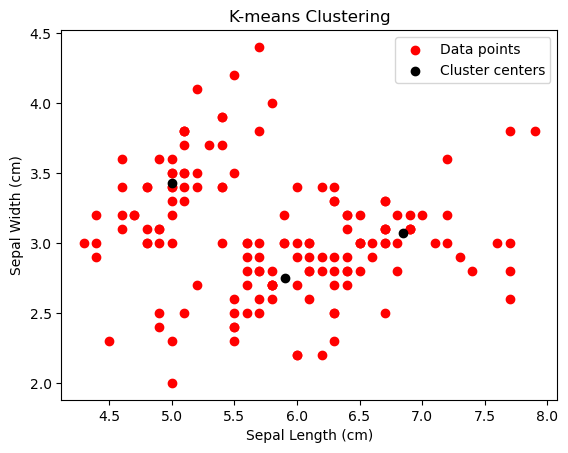

In [38]:
# Convert lists to numpy arrays
x_origin = np.array(x_origin)
y_origin = np.array(y_origin)
x_center = []
y_center = []

for i, j , k ,m in model.cluster_centers_:
    x_center.append(i)
    y_center.append(j)

plt.scatter(x_origin, y_origin, c='r', label='Data points')
plt.scatter(x_center, y_center, c='k', label='Cluster centers')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering')
plt.legend()
plt.show()


# *Visualize Points With its Groups*

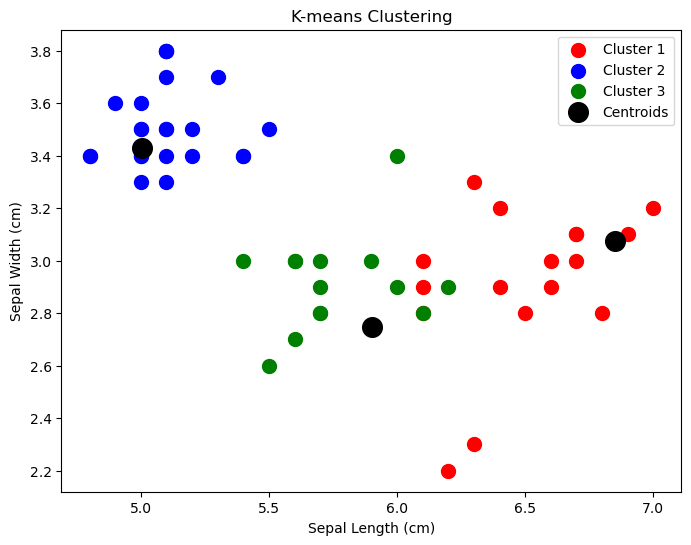

In [40]:
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for cluster 0
plt.scatter(x_origin[np.where(labels == 0)], y_origin[np.where(labels == 0)], s=100, c='red', label='Cluster 1')

# Scatter plot for cluster 1
plt.scatter(x_origin[np.where(labels == 1)], y_origin[np.where(labels == 1)], s=100, c='blue', label='Cluster 2')

# Scatter plot for cluster 2
plt.scatter(x_origin[np.where(labels == 2)], y_origin[np.where(labels == 2)], s=100, c='green', label='Cluster 3')

# Plot the centroids
plt.scatter(x_center, y_center, s=200, c='k', label='Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering')
plt.legend()
plt.show()


